In [17]:
import numpy as np
import torch
from torchvision.models import resnet18

In [5]:
# 加载预训练的ResNet-18模型
model = resnet18(pretrained=True)
data = torch.rand(1,3,64,64)
print(data.shape)
labels = torch.rand(1,1000) # 0~1之间
print(labels.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 1000])
tensor([[0.4033, 0.1302, 0.6163, 0.1651, 0.1236, 0.0067, 0.3133, 0.9204, 0.4291,
         0.0273, 0.8699, 0.6038, 0.4503, 0.9561, 0.6102, 0.4055, 0.8655, 0.6527,
         0.0053, 0.4517, 0.6347, 0.8982, 0.8719, 0.8228, 0.2140, 0.4445, 0.9370,
         0.0097, 0.4603, 0.3578, 0.9882, 0.3427, 0.1251, 0.5239, 0.0388, 0.7209,
         0.6319, 0.3429, 0.5054, 0.4668, 0.3568, 0.6809, 0.3791, 0.3561, 0.8866,
         0.7347, 0.2336, 0.0361, 0.0167, 0.1799, 0.7942, 0.7663, 0.4953, 0.1165,
         0.7693, 0.4893, 0.8975, 0.2838, 0.5148, 0.0777, 0.6561, 0.8863, 0.9875,
         0.8184, 0.2499, 0.7121, 0.6342, 0.6618, 0.6827, 0.1373, 0.4915, 0.2906,
         0.6098, 0.3158, 0.1336, 0.8259, 0.5011, 0.9762, 0.4076, 0.9510, 0.6544,
         0.6815, 0.5454, 0.8686, 0.7195, 0.8573, 0.6319, 0.0264, 0.7677, 0.6759,
         0.7162, 0.9030, 0.4514, 0.9110, 0.7985, 0.1291, 0.6524, 0.5839, 0.7039,
         0.2060, 0.2840, 0.2732, 0.4641, 0.8788, 0.0476, 0.9

In [10]:
# 向前传递  
prediction = model(data)
prediction.shape

torch.Size([1, 1000])

In [13]:
# 计算loss
loss = (prediction-labels).sum()
# 网络反向传播
loss.backward()
'''
在第一行代码中，你计算了预测值与真实标签之间的损失，然后通过.sum()方法对损失进行了求和。

在第二行代码中，你调用了.backward()方法，这会触发PyTorch中的自动微分机制，将损失函数关于模型参数的梯度计算出来，并将这些梯度存储在每个参数的.grad属性中。
'''


In [15]:
# 加载优化器,在本例中为 SGD，学习率为 0.01，动量为 0.9。 我们在优化器中注册模型的所有参数。
optim = torch.optim.SGD(model.parameters(),lr = 1e-2,momentum =0.9)

In [16]:
# 最后，我们调用启动梯度下降。优化器通过存储的梯度来调整每个参数。.step().grad
optim.step()

In [21]:
# Autograd的差异化
a = torch.tensor([2,3],requires_grad=True,dtype=torch.float32)
b = torch.tensor([6,4],requires_grad=True,dtype=torch.float32)
# 另一个张量
Q = 3*a**3 - b**2
# 创建了一个张量 external_grad，其中包含两个值都为 1。这个张量将作为 Q 的外部梯度传入 backward() 方法中，用于计算 Q 对 a 和 b 的梯度。
external_grad = torch.tensor([1., 1.])
# 调用了 PyTorch 的 backward() 方法，计算了张量 Q 对 a 和 b 的梯度。gradient=external_grad 参数表示我们使用了外部提供的梯度来替代自动求导中的单位梯度，这样可以加速计算。
Q.backward(gradient=external_grad)
print(9*a**2 == a.grad)
print(-2*b == b.grad)


tensor([True, True])
tensor([True, True])


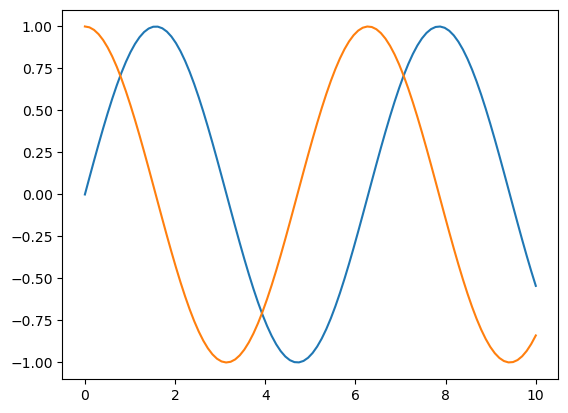

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

In [19]:
import matplotlib.pyplot as plt
x = np.linspace(0,10,100)
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))
plt.show()
print(x)



In [12]:
# 交换维度
data = torch.tensor([
    [1,2,3],
    [4,5,6]
])
data1= torch.tensor(data).permute(1,0)
print(data1)

tensor([[1, 4],
        [2, 5],
        [3, 6]])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17712\3149519479.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data1= torch.tensor(data).permute(1,0)
